In [85]:
import pandas as pd
import numpy as numpy


In [86]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [87]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df.shape

(10000, 14)

In [89]:
df['CreditScore'].isnull().sum()

0

In [90]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [91]:
df.iloc[488]['NumOfProducts']

2

In [92]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [93]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [94]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
#exited == 0,find the tenure and saem for 1
ext_no = df[df.Exited ==0].Tenure
ext_yes = df[df.Exited ==1].Tenure


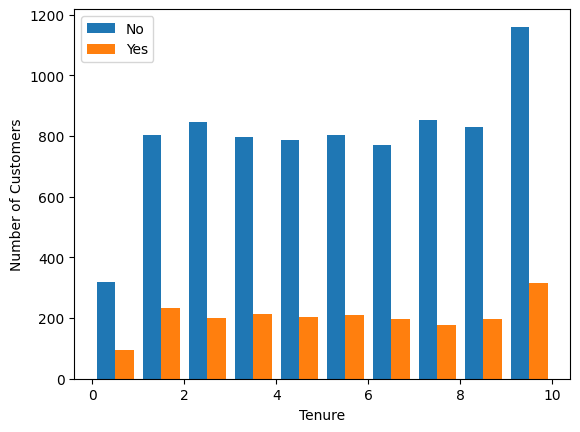

In [96]:
##plot the grpah
from matplotlib import pyplot as plt
plt.hist([ext_no,ext_yes])
plt.legend(['No','Yes'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()

In [97]:
df['Gender'].replace({'Male':0,'Female':1},inplace = True)

In [98]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8709,529,France,0,39,6,102025.08,2,1,0,12351.01,0
669,640,France,1,42,5,176099.13,1,1,1,8404.73,0


In [99]:
# One-Hot Encoding For the

In [100]:
one_hot = pd.get_dummies(df['Geography'],
                         dtype=int,
                         prefix = 'Geography'
                         )

In [101]:
one_hot

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [102]:
df = df.drop(columns = ['Geography'],
             axis = 1)

In [103]:
df = pd.concat([df,one_hot],axis = 1)

In [104]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [105]:
df.shape

(10000, 13)

In [107]:
# Dependent variable is X
#Independent Variables is y

X =df.drop(columns = ['Exited'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [108]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
##Split the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [110]:
X_train.shape,"---- ",X_test.shape,"---- ",y_train.shape,"---- ",y_test.shape

((8000, 12), '---- ', (2000, 12), '---- ', (8000,), '---- ', (2000,))

In [111]:
##Bulid neural network model

import tensorflow as tf
from tensorflow.keras. models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [112]:
model = Sequential()
model.add(Dense(32,input_dim = X_train.shape[1],activation ='relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))


In [113]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'accuracy',
    mode = 'min',
    verbose = 1,
    patience = 25
)

In [119]:
model.fit(X_train,y_train,
          epochs =100,
          batch_size =32,
          verbose =1,
          callbacks = [early_stop]
          )

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 27.5251 - accuracy: 0.6905
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 25.4787 - accuracy: 0.6954
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 25.5175 - accuracy: 0.6927
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 21.5151 - accuracy: 0.6924
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 25.7876 - accuracy: 0.6910
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 23.4673 - accuracy: 0.6905
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 24.9663 - accuracy: 0.7003
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 20.7342 - accuracy: 0.6967
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 23.2183 - accuracy: 0.7004
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 20.169

In [120]:
#Evalute
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 17.3913 - accuracy: 0.4980


[17.391258239746094, 0.49799999594688416]

In [122]:
#Predict the model
y_pred = model.predict(X_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[1.0000000e+00],
       [0.0000000e+00],
       [3.0076890e-14],
       ...,
       [2.8377727e-09],
       [2.7152598e-27],
       [1.0000000e+00]], dtype=float32)

In [124]:
y_pred[:5]

array([[1.000000e+00],
       [0.000000e+00],
       [3.007689e-14],
       [1.000000e+00],
       [1.000000e+00]], dtype=float32)

In [123]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [126]:
y_prediction = []
for i in y_pred:
  if i > 0.5:
    y_prediction.append(1)
  else:
    y_prediction.append(0)

In [128]:
print(y_prediction) ##the

[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 

In [133]:
#classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.44      0.59      1607
           1       0.24      0.73      0.36       393

    accuracy                           0.50      2000
   macro avg       0.56      0.58      0.47      2000
weighted avg       0.75      0.50      0.54      2000



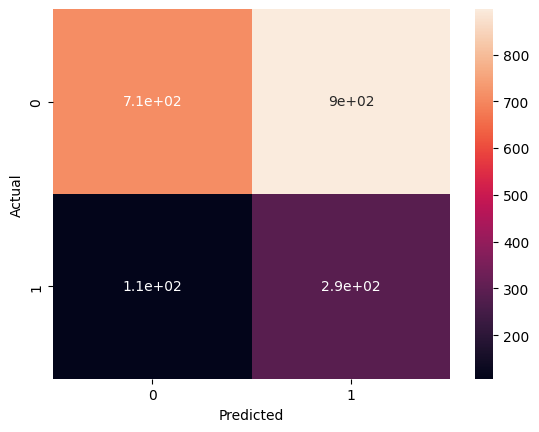

In [137]:
import seaborn as sns
from sklearn.metrics import confusion_matrix # Import confusion_matrix
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_prediction)


sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()